In [253]:
import numpy as np
import pandas as pd

In [254]:
df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/imdb_labelled.txt",delimiter = '\t',names = ['Reviews','Status'])

In [255]:
df

,Reviews,Status
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [256]:
df['Reviews'][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [257]:
from collections import Counter
print(Counter(df['Status']))

Counter({1: 386, 0: 362})


In [258]:
df.isnull().sum()

Reviews    0
Status     0
dtype: int64

In [259]:
X = df['Reviews']
Y = df['Status']

In [260]:
X

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
                             ...                        
743    I just got bored watching Jessice Lange take h...
744    Unfortunately, any virtue in this film's produ...
745                     In a word, it is embarrassing.  
746                                 Exceptionally bad!  
747    All in all its an insult to one's intelligence...
Name: Reviews, Length: 748, dtype: object

In [261]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
743    0
744    0
745    0
746    0
747    0
Name: Status, Length: 748, dtype: int64

# Data Cleaning

In [262]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [315]:
ps = PorterStemmer()
lemma = WordNetLemmatizer()
corpus = []

In [316]:
for i in range(0,len(X)):
    review = re.sub('[^a-z]',' ',X[i])
    review = review.lower()
    review = review.split()
    #stemming
    #review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    #lemmatising
    review = [lemma.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    

In [317]:
corpus

['slow moving aimless movie distressed drifting young man',
 'ot sure lost flat character audience nearly half walked',
 'ttempting artiness black white clever camera angle movie disappointed became even ridiculous acting poor plot line almost non existent',
 'ery little music anything speak',
 'best scene movie erardo trying find song keep running head',
 'rest movie lack art charm meaning f emptiness work guess empty',
 'asted two hour',
 'aw movie today thought good effort good message kid',
 'bit predictable',
 'oved casting immy uffet science teacher',
 'nd baby owl adorable',
 'movie showed lot lorida best made look appealing',
 'ongs ere est nd uppets ere ilarious',
 'ool',
 'right case movie delivers everything almost right face',
 'average acting main person low budget clearly see',
 'review long overdue since consider ale wo isters single greatest film ever made',
 'put gem movie term screenplay cinematography acting post production editing directing aspect film making',
 'pr

In [318]:
len(corpus)

748

In [267]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding

In [268]:
vocab_size = 5000

# One_hot

In [269]:
onehot = [one_hot(word,vocab_size) for word in corpus]

In [270]:
onehot

[[4046, 2970, 3362, 1808, 904, 4224, 2162, 4181],
 [2646, 3137, 4819, 605, 1959, 3124, 3113, 159, 3644],
 [4825,
  3022,
  2176,
  2306,
  3159,
  113,
  4095,
  1808,
  4571,
  2299,
  4893,
  510,
  953,
  48,
  2148,
  280,
  190,
  4397,
  1878],
 [2442, 1205, 668, 1132, 4774],
 [1070, 2313, 1808, 3468, 1469, 3515, 4033, 961, 3476, 3819],
 [1500, 1808, 4244, 4963, 4901, 3262, 2749, 708, 2935, 2857, 2901],
 [2798, 799, 3113],
 [2033, 1808, 3290, 4918, 4501, 2305, 4501, 2396, 3106],
 [3429, 4295],
 [2420, 2773, 3347, 111, 2110, 4230],
 [4042, 4249, 4349, 2156],
 [1808, 4350, 2033, 3545, 1070, 2706, 657, 3136],
 [2220, 1761, 3771, 4042, 687, 1761, 4539],
 [2545],
 [3931, 3265, 1808, 3157, 1708, 190, 3931, 2256],
 [639, 953, 815, 3457, 787, 3308, 3980, 3993],
 [2992, 4137, 2512, 1015, 1415, 4686, 860, 1932, 4956, 2311, 3696, 1501, 2706],
 [3423,
  121,
  1808,
  708,
  2814,
  4823,
  953,
  2636,
  2487,
  12,
  3614,
  1368,
  3696,
  4722],
 [1304, 316, 1450, 4944, 1496, 2657, 4944]

In [271]:
onehot[0]

[4046, 2970, 3362, 1808, 904, 4224, 2162, 4181]

In [272]:
len(onehot[0])

8

# Padding

In [273]:
max_length = 25

In [274]:
pad_docs = pad_sequences(onehot,padding ='pre',maxlen = max_length)

In [275]:
pad_docs

array([[   0,    0,    0, ..., 4224, 2162, 4181],
       [   0,    0,    0, ..., 3113,  159, 3644],
       [   0,    0,    0, ...,  190, 4397, 1878],
       ...,
       [   0,    0,    0, ..., 4691, 4290, 3306],
       [   0,    0,    0, ...,    0, 4394, 1223],
       [   0,    0,    0, ..., 1221,  118, 3212]])

In [276]:
len(pad_docs[0])

25

In [277]:
pad_docs.shape

(748, 25)

# Creating model

In [278]:
dimensions = 40

In [279]:
model = Sequential()
model.add(Embedding(vocab_size,dimensions,input_length = max_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [280]:
inputs = np.array(pad_docs)
Y = np.array(Y)#labels

In [281]:
inputs.shape

(748, 25)

In [282]:
print(type(inputs))
print(type(Y))
print(Y.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(748,)


# splitting

In [296]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(inputs,Y,test_size = 0.25,random_state = 42) 

In [297]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(561, 25)
(187, 25)
(561,)
(187,)


In [298]:
cl = model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=10,batch_size = 64)

Train on 561 samples, validate on 187 samples
Epoch 1/10
561/561 [==============================] - 0s 701us/step - loss: 0.3467 - acc: 0.8556 - val_loss: 0.3506 - val_acc: 0.8984
Epoch 2/10
561/561 [==============================] - 0s 661us/step - loss: 0.2787 - acc: 0.9144 - val_loss: 0.3288 - val_acc: 0.9037
Epoch 3/10
561/561 [==============================] - 0s 672us/step - loss: 0.2142 - acc: 0.9269 - val_loss: 0.3022 - val_acc: 0.9091
Epoch 4/10
561/561 [==============================] - 0s 677us/step - loss: 0.1586 - acc: 0.9412 - val_loss: 0.3250 - val_acc: 0.8396
Epoch 5/10
561/561 [==============================] - 0s 671us/step - loss: 0.1357 - acc: 0.9430 - val_loss: 0.3208 - val_acc: 0.8342
Epoch 6/10
561/561 [==============================] - 0s 668us/step - loss: 0.1149 - acc: 0.9626 - val_loss: 0.3091 - val_acc: 0.8717
Epoch 7/10
561/561 [==============================] - 0s 662us/step - loss: 0.0926 - acc: 0.9697 - val_loss: 0.3231 - val_acc: 0.8663
Epoch 8/10
561/5

In [299]:
predict = model.predict(Xtest)

In [300]:
predict

array([[1.77282870e-01],
       [1.50585890e-01],
       [2.25909650e-02],
       [7.82782257e-01],
       [9.91848469e-01],
       [2.28025913e-02],
       [5.22005558e-01],
       [9.95914936e-01],
       [2.36826837e-02],
       [9.16279733e-01],
       [5.32306671e-01],
       [9.99886990e-01],
       [9.13707614e-01],
       [4.58922982e-03],
       [9.98496354e-01],
       [5.00214815e-01],
       [5.83503485e-01],
       [5.61773777e-03],
       [8.27759504e-04],
       [9.41538811e-02],
       [9.48611915e-01],
       [9.98593509e-01],
       [6.93404377e-02],
       [8.17149878e-04],
       [2.36588717e-03],
       [5.09247601e-01],
       [9.99965727e-01],
       [3.91456485e-03],
       [4.09578979e-01],
       [1.09823942e-02],
       [9.99762475e-01],
       [3.75732780e-03],
       [9.98347998e-01],
       [9.97555256e-01],
       [2.33798206e-01],
       [1.45056844e-03],
       [9.12047446e-01],
       [9.99899030e-01],
       [2.48605013e-03],
       [5.26274979e-01],


In [301]:
Ypred = np.round(predict)

In [302]:
Ypred

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],

In [303]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest,Ypred))

[[75 21]
 [ 3 88]]


In [304]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Ytest,Ypred))

0.8716577540106952


# Data Visualization

In [305]:
import matplotlib.pyplot as plt

In [306]:
cl.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

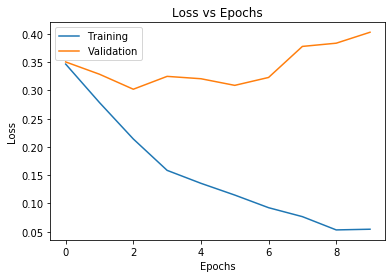

In [307]:
#Loss visualization
plt.plot(cl.history['loss'],label = 'Training')
plt.plot(cl.history['val_loss'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

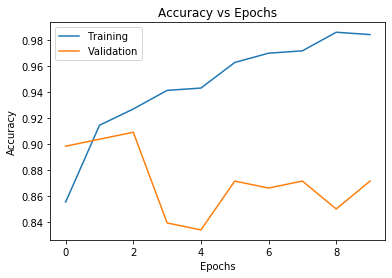

In [308]:
#Accuracy visualization
plt.plot(cl.history['acc'],label = 'Training')
plt.plot(cl.history['val_acc'],label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()